In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
########### <HW3> ###############

In [3]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
RISKY_ASSETS = ['AAPL', 'IBM', 'MSFT']
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'

n_assets = len(RISKY_ASSETS)

In [4]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, end=END_DATE, adjusted=True)

[*********************100%***********************]  3 of 3 completed


In [5]:
returns_df = prices_df['Adj Close'].pct_change().dropna()

avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

In [6]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))

weights /= np.sum(weights, axis=1)[:,np.newaxis]

In [7]:
portf_rtns = np.dot(weights,avg_returns) 

portf_vol = [] 
for i in range(0, len(weights)): 
   portf_vol.append(np.sqrt(np.dot(np.dot(cov_mat, weights[i]).T, weights[i].T)))
  

portf_vol = np.array(portf_vol) 
portf_sharpe_ratio = portf_rtns / portf_vol 

In [8]:
portf_results_df = pd.DataFrame({'returns': portf_rtns, 
                                 'volatility': portf_vol, 
                                 'sharpe_ratio': portf_sharpe_ratio})

portf_results_df

,returns,volatility,sharpe_ratio
0,-0.041840,0.229741,-0.182118
1,-0.032099,0.250965,-0.127902
2,-0.052786,0.232481,-0.227057
3,0.101937,0.262020,0.389045
4,-0.038378,0.251882,-0.152365
...,...,...,...
99995,0.061836,0.245998,0.251370
99996,0.049962,0.250287,0.199618
99997,-0.048927,0.229516,-0.213177
99998,0.050206,0.256902,0.195430


In [9]:
N_POINTS = 10000
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                            portf_results_df.returns.max(), 
                            N_POINTS)

portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

In [10]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)

max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]


print('Maximum Sharpe Ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
returns: 21.28% volatility: 28.30% sharpe_ratio: 75.20% 
Weights
AAPL: 0.19% IBM: 0.29% MSFT: 99.52% 

In [11]:
min_vol_ind = np.argmin(portf_results_df.volatility)

min_vol_portf = portf_results_df.loc[min_vol_ind]


print('Minimum Volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
returns: -12.38% volatility: 22.58% sharpe_ratio: -54.84% 
Weights
AAPL: 28.08% IBM: 58.69% MSFT: 13.22% 

In [12]:
######### <HW4> ##########

In [13]:
import matplotlib.pyplot as plt

In [14]:
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'

In [15]:
#maximum Sharp ratio
port_rtn_sharp = returns_df['AAPL']*0.0019 + returns_df['IBM']*0.0029 + returns_df['MSFT']*0.9952

adj_close_sharp = port_rtn_sharp+100

In [16]:
adj_close_sharp

Date
2018-01-03    100.004711
2018-01-04    100.008827
2018-01-05    100.012374
2018-01-08    100.001026
2018-01-09     99.999330
                 ...    
2018-12-21     99.967716
2018-12-24     99.958324
2018-12-26    100.068219
2018-12-27    100.006186
2018-12-28     99.992211
Length: 249, dtype: float64

In [17]:
train_sharp = port_rtn_sharp['2018-01-01':'2018-11-30']
test_sharp = port_rtn_sharp['2018-12-01':'2018-12-31']

In [18]:
T_sharp = len(test_sharp)
N_sharp = len(test_sharp)
s_0_sharp = adj_close_sharp[train_sharp.index[-1]]
N_SIM_sharp = 100
mu_sharp = train_sharp.mean()
sigma_sharp = train_sharp.std()

In [19]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed):
  np.random.seed(random_seed)

  dt = T/N
  dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
  W = np.cumsum(dW, axis =1)

  time_step = np.linspace(dt, T, N)
  time_steps = np.broadcast_to(time_step, (n_sims, N))

  S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps + sigma * W)
  S_t = np.insert(S_t, 0, s_0, axis=1)

  return S_t

In [20]:
gbm_simulations_sharp = simulate_gbm(s_0_sharp, mu_sharp, sigma_sharp, N_SIM_sharp, 
                                     T_sharp, N_sharp, 42) 

In [21]:
gbm_simulations_sharp

array([[100.00637848, 100.96347002, 100.8469031 , ..., 101.20139981,
         99.60851078, 100.25364372],
       [100.00637848,  98.6059684 ,  96.40401872, ...,  94.69263728,
         96.12422405,  94.2808141 ],
       [100.00637848, 100.47583688,  97.33191527, ...,  92.93811085,
         91.99356582,  93.05372754],
       ...,
       [100.00637848, 101.77928696, 102.76091586, ..., 113.03248414,
        113.3085156 , 110.42542464],
       [100.00637848,  99.7099674 ,  98.42088155, ..., 100.29497834,
         98.06518497,  98.04288052],
       [100.00637848,  97.62129588,  98.99305927, ...,  94.58931545,
         96.42955446,  96.57708613]])

In [22]:
last_train_date_sharp = train_sharp.index[-1].date()
first_test_date_sharp = test_sharp.index[0].date()
last_test_date_sharp = test_sharp.index[-1].date()

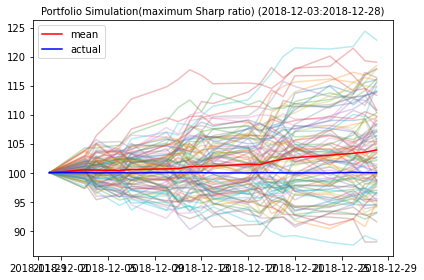

In [23]:
plot_title = (f'Portfolio Simulation(maximum Sharp ratio) 'f'({first_test_date_sharp}:{last_test_date_sharp})')

selected_indices = adj_close_sharp[last_train_date_sharp:last_test_date_sharp].index
index = [date.date() for date in selected_indices]

gbm_simulations_sharp_df = pd.DataFrame(gbm_simulations_sharp.T,index = index)

ax = gbm_simulations_sharp_df.plot(alpha=0.3, legend=False)
line_1, = ax.plot(index, gbm_simulations_sharp_df.mean(axis=1), color='red')
line_2, = ax.plot(index, adj_close_sharp[last_train_date_sharp:last_test_date_sharp], color='blue')
ax.set_title(plot_title, fontsize=10)
ax.legend((line_1, line_2), ('mean', 'actual'))

plt.tight_layout()

plt.show()

In [24]:
#minimum variance
port_rtn_variance = returns_df['AAPL']*0.2808 + returns_df['IBM']*0.5869 + returns_df['MSFT']*0.1322

adj_close_variance = port_rtn_variance+100

In [25]:
adj_close_variance

Date
2018-01-03    100.016699
2018-01-04    100.014355
2018-01-05    100.007703
2018-01-08    100.002632
2018-01-09    100.001171
                 ...    
2018-12-21     99.974005
2018-12-24     99.969389
2018-12-26    100.049647
2018-12-27    100.011585
2018-12-28     99.995243
Length: 249, dtype: float64

In [26]:
train_variance = port_rtn_variance['2018-01-01':'2018-11-30']
test_variance = port_rtn_variance['2018-12-01':'2018-12-31']

In [27]:
T_variance = len(test_variance)
N_variance = len(test_variance)
s_0_variance = adj_close_variance[train_variance.index[-1]]
N_SIM_variance = 100
mu_variance = train_variance.mean()
sigma_variance = train_variance.std()

In [28]:
gbm_simulations_variance = simulate_gbm(s_0_variance, mu_variance, sigma_variance, 
                                        N_SIM_variance, T_variance, N_variance, 50) 

In [29]:
gbm_simulations_variance

array([[100.01280197,  97.93049156,  97.87216345, ...,  95.66225404,
         99.97740365, 101.28789302],
       [100.01280197, 100.16034412, 101.14145782, ..., 105.19166031,
        106.23730412, 106.73534626],
       [100.01280197,  99.57483909, 101.40127399, ...,  96.47367725,
        100.0081788 ,  98.01628376],
       ...,
       [100.01280197,  99.87751298,  98.97168135, ...,  93.8506694 ,
         92.04920604,  93.84189358],
       [100.01280197, 100.81997988,  98.70386004, ...,  98.42934575,
         98.69508961, 100.2534753 ],
       [100.01280197,  99.48031078, 100.22994699, ..., 100.83404958,
         99.56795694, 100.09311208]])

In [30]:
last_train_date_variance = train_variance.index[-1].date()
first_test_date_variance = test_variance.index[0].date()
last_test_date_variance = test_variance.index[-1].date()

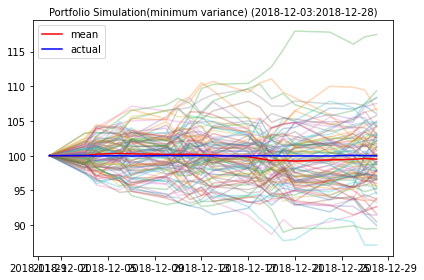

In [31]:
plot_title = (f'Portfolio Simulation(minimum variance) 'f'({first_test_date_variance}:{last_test_date_variance})')

selected_indices_variance = adj_close_variance[last_train_date_variance:last_test_date_variance].index
index_variance = [date.date() for date in selected_indices_variance]

gbm_simulations_variance_df = pd.DataFrame(gbm_simulations_variance.T,index = index_variance)

ax = gbm_simulations_variance_df.plot(alpha=0.3, legend=False)
line_1, = ax.plot(index_variance, gbm_simulations_variance_df.mean(axis=1), color='red')
line_2, = ax.plot(index_variance, adj_close_variance[last_train_date_variance:last_test_date_variance], color='blue')
ax.set_title(plot_title, fontsize=10)
ax.legend((line_1, line_2), ('mean', 'actual'))

plt.tight_layout()

plt.show()